In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
cv_df = pd.read_csv('cardio_train.csv', sep=';')
cv_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
#drop id 
cv_df = cv_df.drop(columns='id')
cv_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
#convert age from days to years
cv_df['age'] = cv_df['age']/365
cv_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
cv_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [12]:
cv_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
cv_df[cv_df['age']>64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160,78.0,140,90,1,1,0,0,1,0
643,64.802740,1,154,79.0,130,80,1,1,0,0,1,0
2936,64.808219,2,156,60.0,140,90,1,1,0,0,1,1
4295,64.849315,1,169,75.0,120,80,1,1,0,0,1,0
9787,64.838356,2,165,70.0,120,80,1,1,0,0,0,0
10422,64.816438,2,177,102.0,130,80,1,2,0,0,1,0
16439,64.821918,1,160,65.0,130,80,3,3,0,0,0,1
18062,64.863014,1,140,48.0,170,100,2,1,0,0,1,1
20931,64.904110,1,165,63.0,150,90,2,1,0,0,1,1
22229,64.838356,2,170,91.0,130,90,1,1,0,0,1,0


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'height'}>],
       [<AxesSubplot: title={'center': 'weight'}>,
        <AxesSubplot: title={'center': 'ap_hi'}>,
        <AxesSubplot: title={'center': 'ap_lo'}>],
       [<AxesSubplot: title={'center': 'cholesterol'}>,
        <AxesSubplot: title={'center': 'gluc'}>,
        <AxesSubplot: title={'center': 'smoke'}>],
       [<AxesSubplot: title={'center': 'alco'}>,
        <AxesSubplot: title={'center': 'active'}>,
        <AxesSubplot: title={'center': 'cardio'}>]], dtype=object)

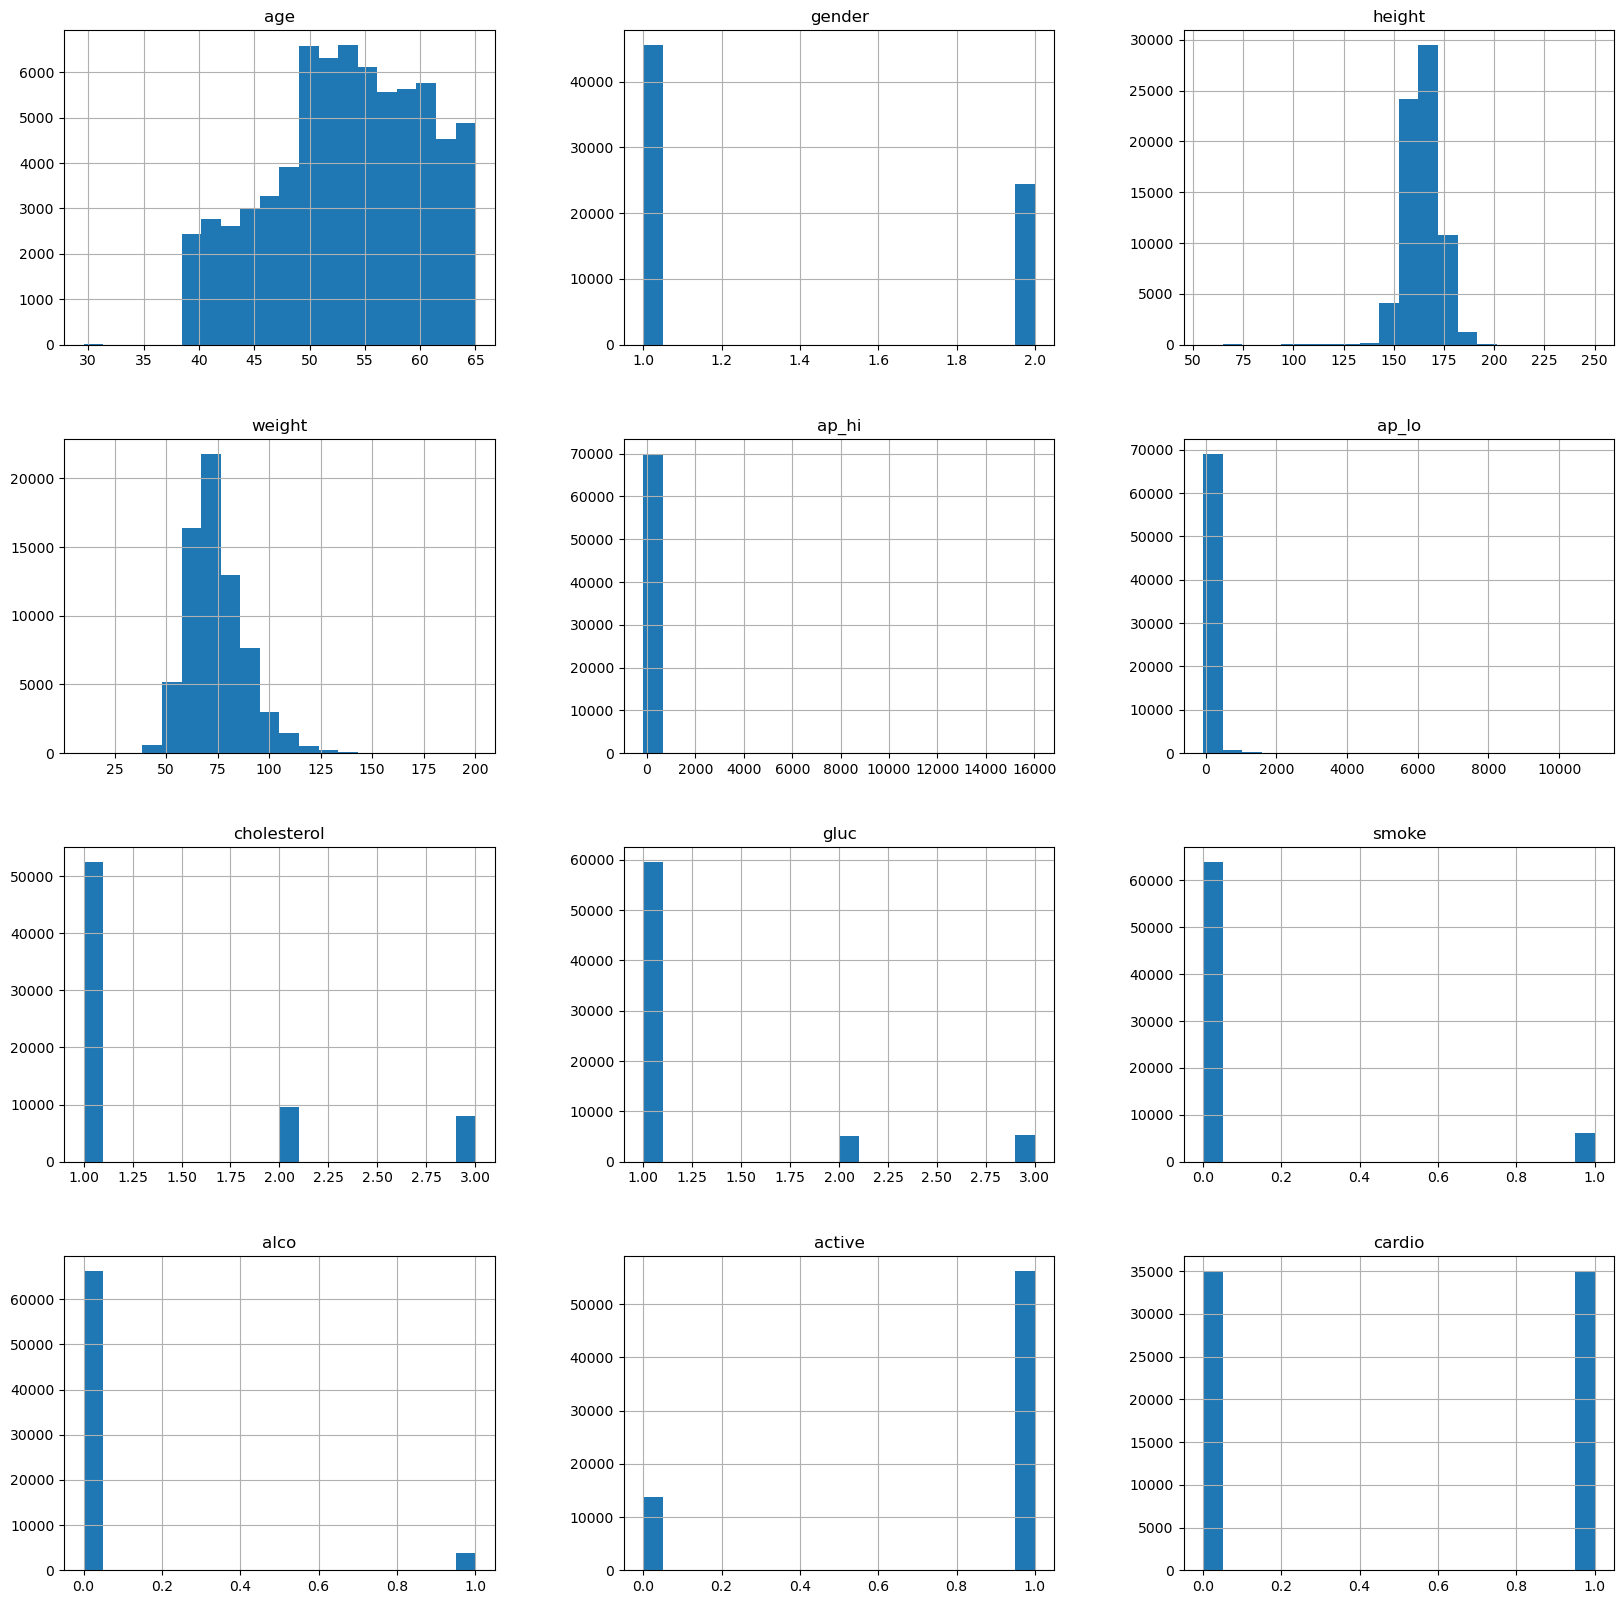

In [15]:
#visualize dataset
cv_df.hist(bins=20, figsize=(20,20))

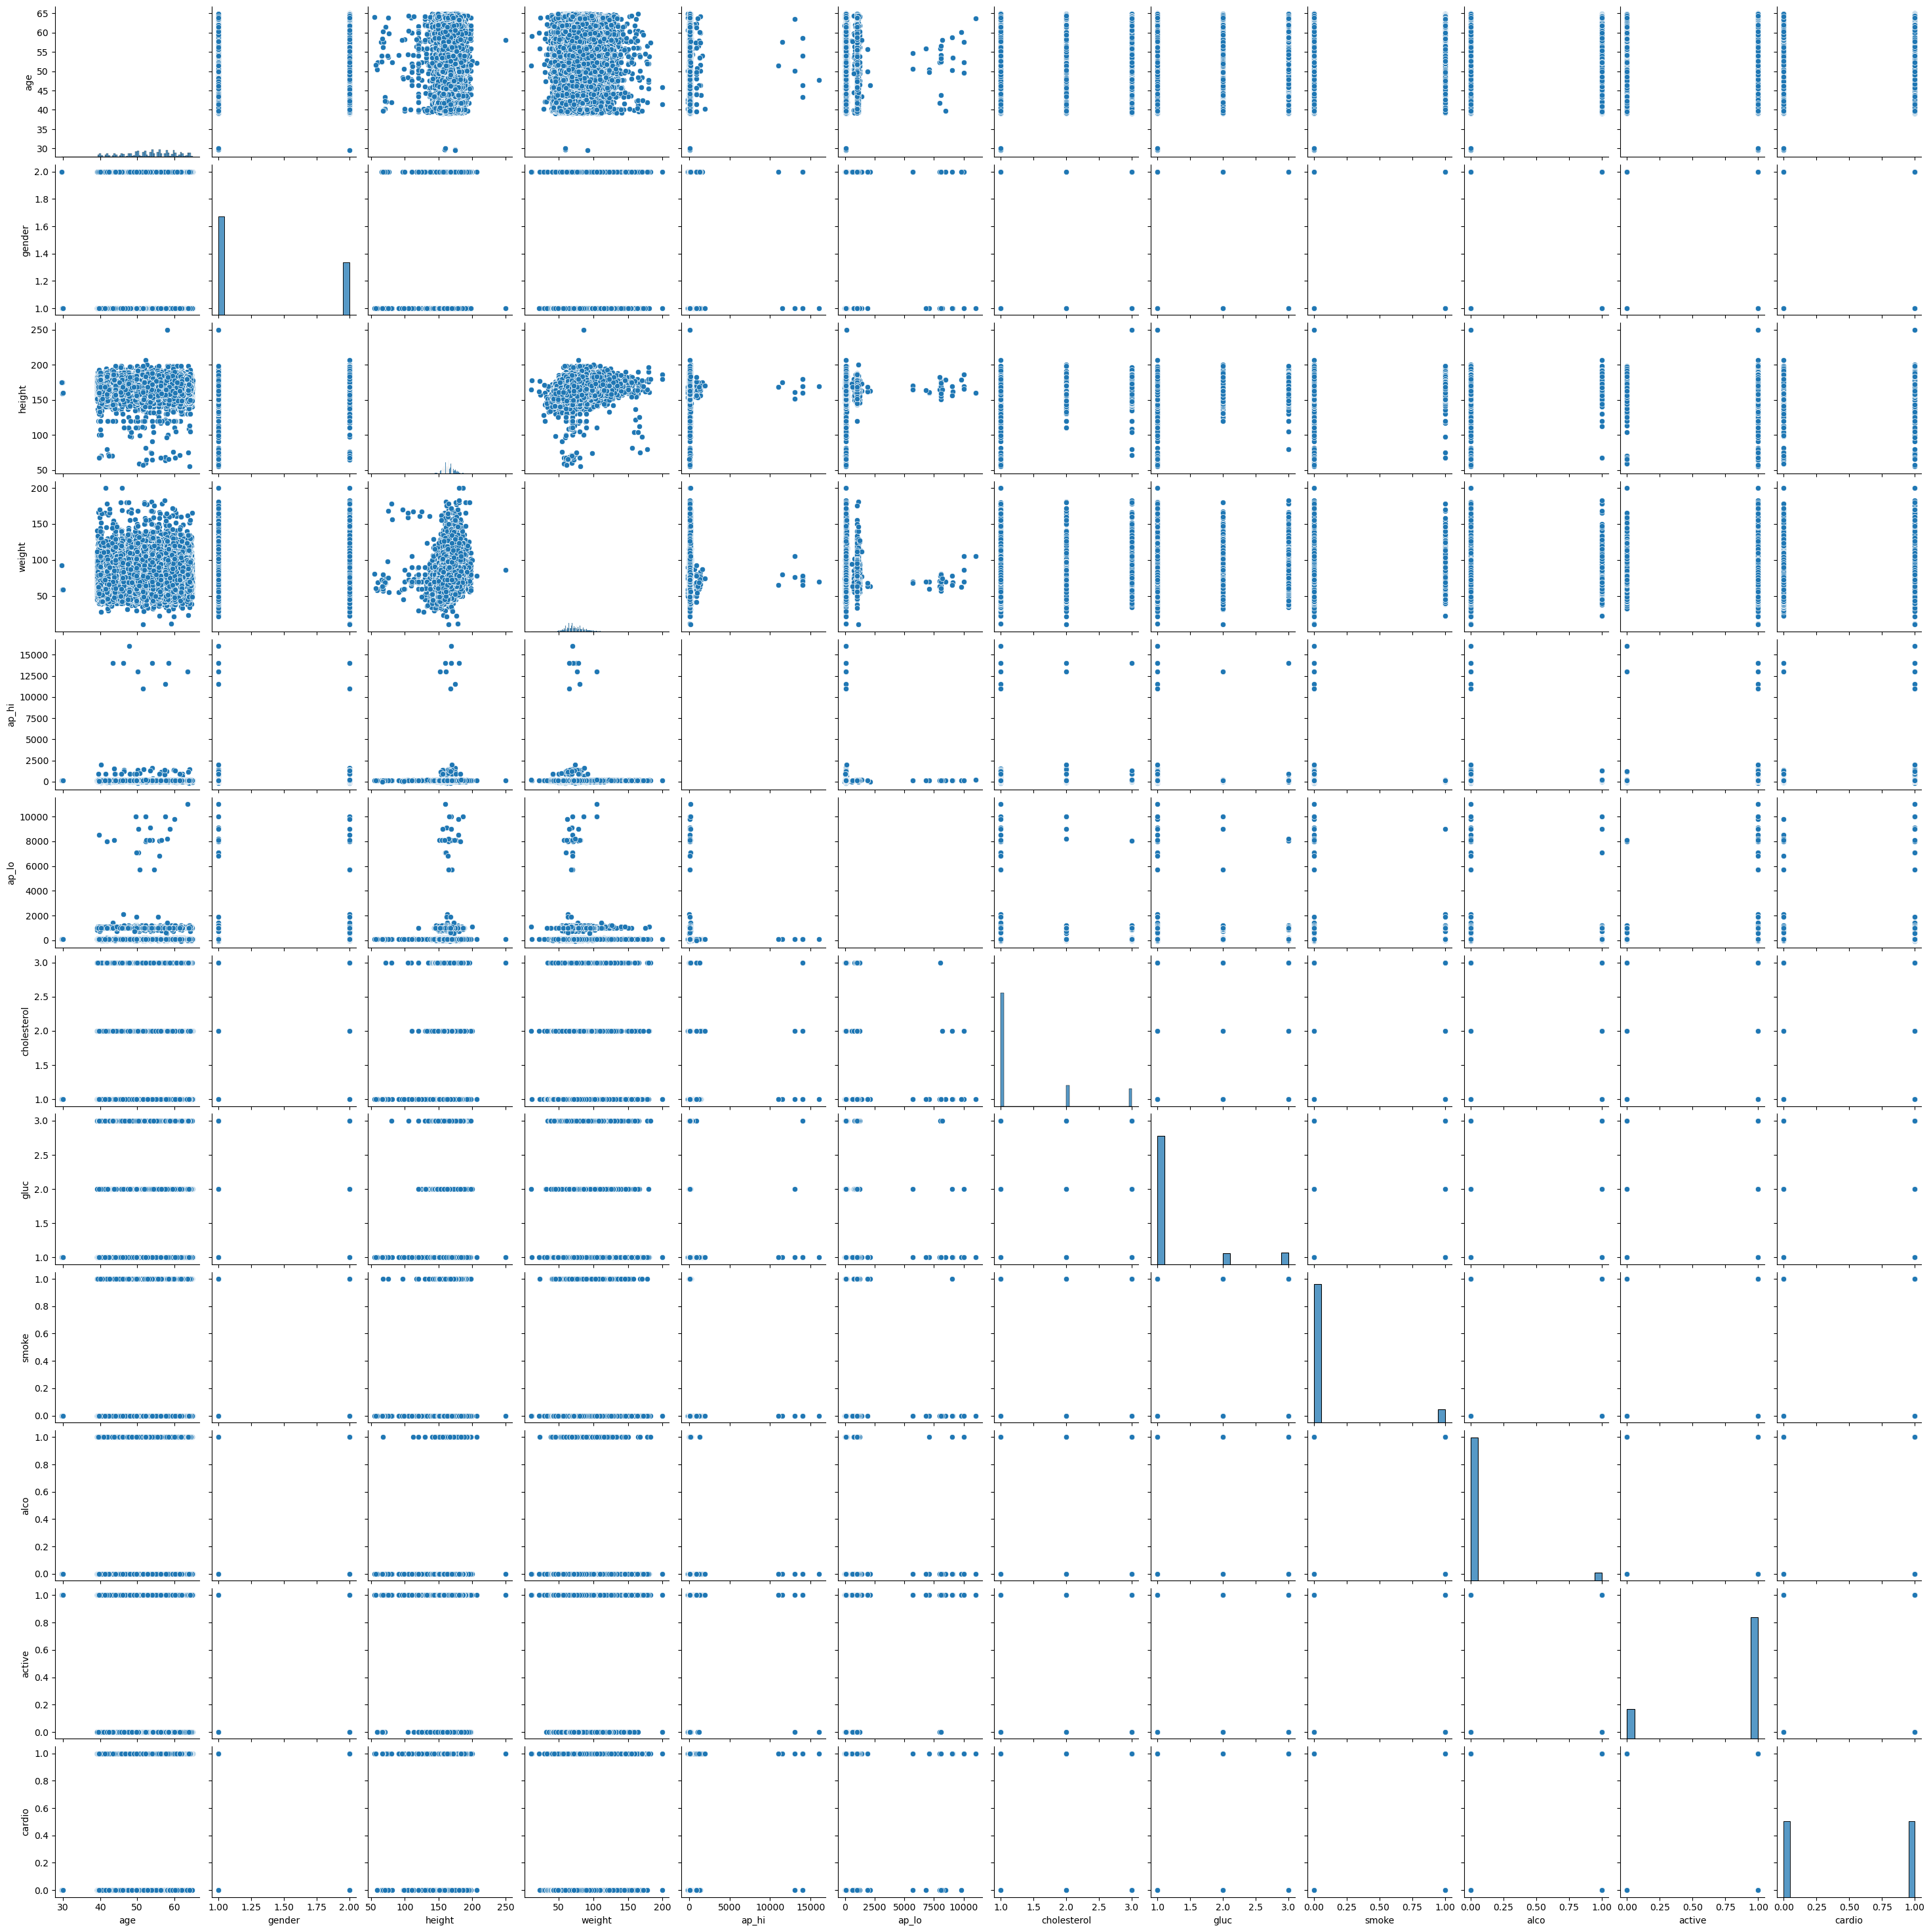

In [ ]:
sns.pairplot(cv_df)

<AxesSubplot: >

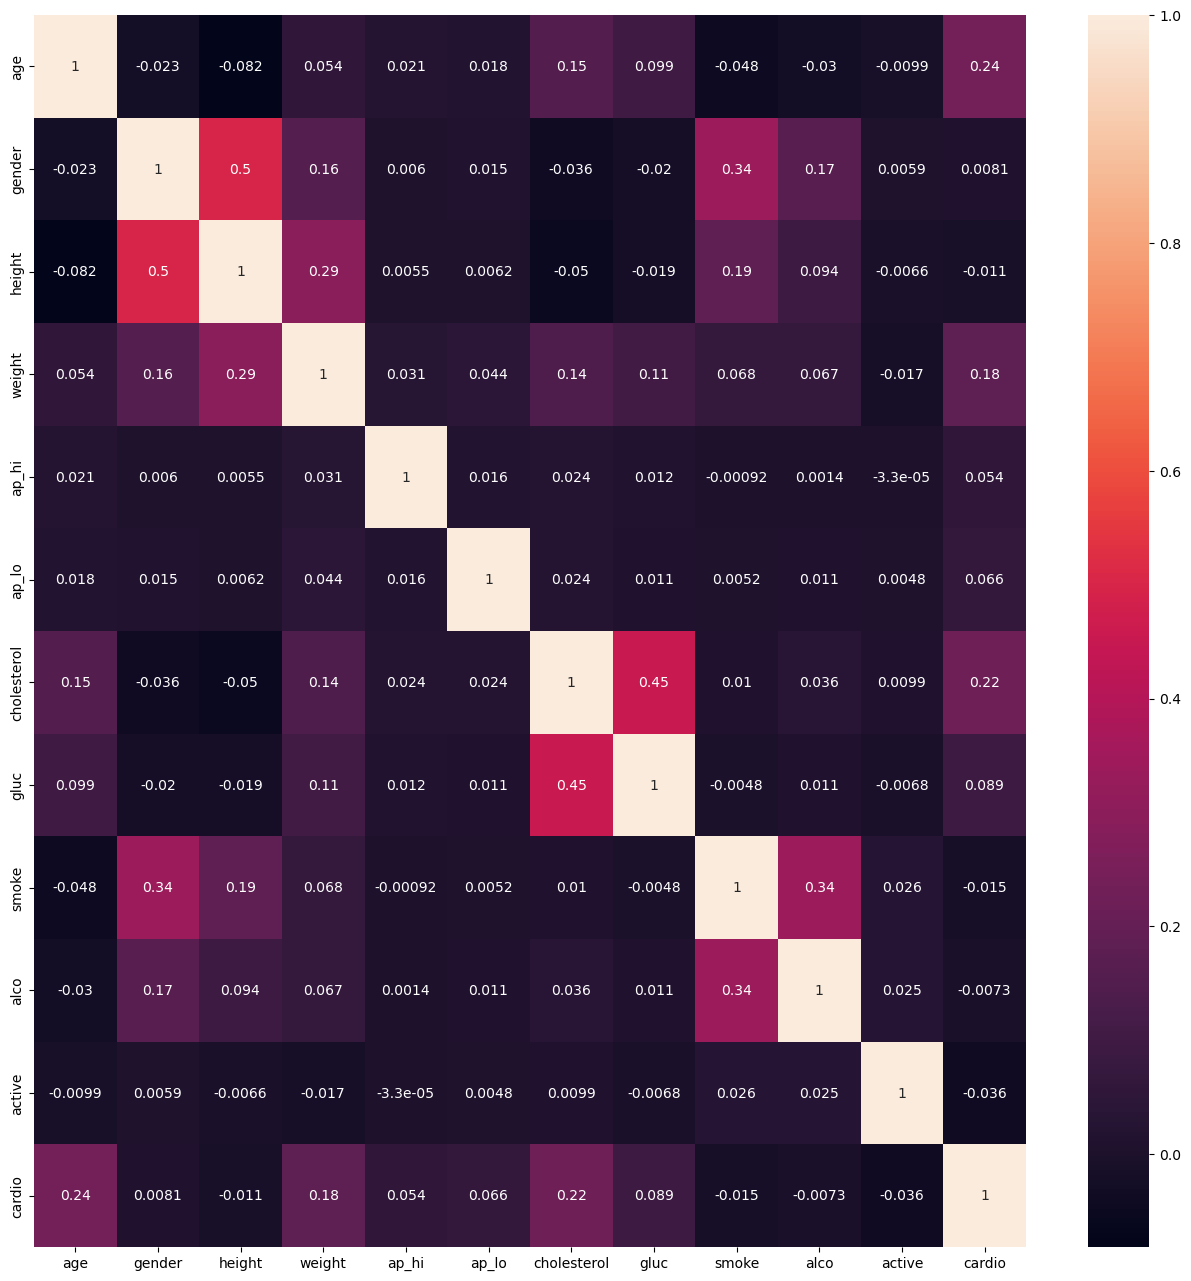

In [18]:
plt.figure(figsize=(16,16))
corr = cv_df.corr()
sns.heatmap(corr, annot=True)

In [19]:
#split data into target and features
df_target = cv_df['cardio']
df_final = cv_df.drop(columns=['cardio'])

In [21]:
cv_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [23]:
df_target.shape

(70000,)

In [24]:
df_final.shape

(70000, 11)

In [25]:
#split into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_final, df_target)

In [26]:
x_train.shape

(52500, 11)

In [27]:
y_train.shape

(52500,)

In [28]:
x_test.shape

(17500, 11)

In [29]:
y_test.shape

(17500,)

In [30]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:0000:0100:010m


In [40]:
#train and test xgboost model
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate = 0.01, n_estimators = 500, max_depth=20)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
#make predictions
predict = model.predict(x_test)
predict

array([0, 1, 1, ..., 0, 1, 1])

<AxesSubplot: >

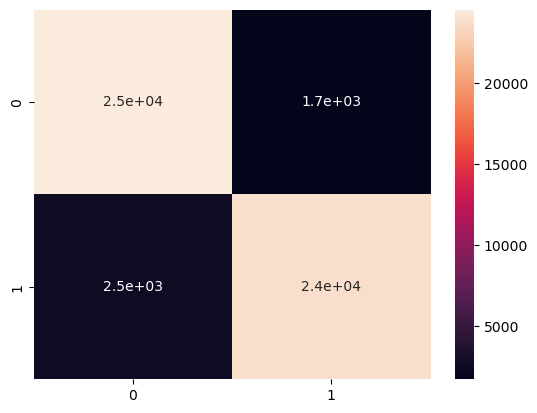

In [42]:
#evalaute model
predict_train = model.predict(x_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True) 

In [43]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('Precision = {}'.format(precision_score(y_train, predict_train)))
print('Recall = {}'.format(recall_score(y_train, predict_train)))
print('Accuracy = {}'.format(accuracy_score(y_train, predict_train)))

Precision = 0.9332442733094967
Recall = 0.9039427614553205
Accuracy = 0.9195619047619048


In [44]:
print('Precision = {}'.format(precision_score(y_test, predict)))
print('Recall = {}'.format(recall_score(y_test, predict)))
print('Accuracy = {}'.format(accuracy_score(y_test, predict)))

Precision = 0.7352268624383199
Recall = 0.701941859129036
Accuracy = 0.7260571428571428


<AxesSubplot: >

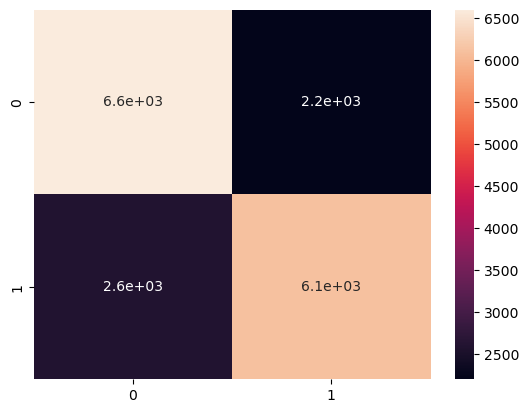

In [45]:
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

In [46]:
param_grid = {
    'gamma': [0.5, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

In [50]:
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(learning_rate = 0.01, n_estimators = 100, objective = 'binary:logistic')
grid = GridSearchCV(xgb_model, param_grid, verbose=4)

In [51]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.728 total time=   0.5s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.729 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.724 total time=   0.4s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.729 total time=   0.4s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.727 total time=   0.5s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.728 total time=   0.4s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.730 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.724 total time=   0.4s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.730 tot

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=4)

In [52]:
y_predict_optim = grid.predict(x_test)
y_predict_optim

array([0, 1, 1, ..., 0, 0, 1])

In [53]:
print('Precision = {}'.format(precision_score(y_test, y_predict_optim)))
print('Recall = {}'.format(recall_score(y_test, y_predict_optim)))
print('Accuracy = {}'.format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.7639135959339263
Recall = 0.6907962771458118
Accuracy = 0.7400571428571429
